In [2]:
import pickle as pkl
import yaml
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import fastText
from tqdm import tqdm
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

In [3]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)

In [4]:
rep_type = "ft"
model_type = "disc_spe"
bag_type = "cie"
description = "disc_spe_cie_ft_avg_bagTransformer_bs64"

In [5]:
tgt_file = os.path.join(CFG["datadir"],"jobs_outputs_" + description + ".pkl")
with open(tgt_file, "rb") as f:
    jobs_outs = torch.load(f)

In [6]:
tgt_file = os.path.join(CFG["datadir"],"OUTPUTS_well_classified_disc_spe_cie_ft_avg_bagTransformer_bs64_TEST.pkl")
with open(tgt_file, "rb") as f:
    well_classified = torch.load(f)

In [7]:
with open(os.path.join(CFG["datadir"], 'lookup_cie.pkl'), 'rb') as f_name:
    lookup_cie = pkl.load(f_name)

In [8]:
def label_to_one_hot(label, num_classes):
    tmp = np.zeros((1, num_classes))
    tmp[0, label[0][0]] = 1.
    return tmp
def prediction_to_argmax(prediction, num_classes):
    tmp = np.zeros((1, num_classes))
    armx = torch.argmax(prediction, dim=-1)
    tmp[0, armx] = 1.
    return tmp

In [9]:
for k in tqdm(well_classified):
    tmp = []
    for j in jobs_outs[k]["jobs_outputs"]:
        argmaxed_job = prediction_to_argmax(j, 207)
        tmp.append(argmaxed_job)
    jobs_outs[k]["argmax_pred"] = np.concatenate(tmp)

100%|██████████| 1468/1468 [00:00<00:00, 9274.09it/s]


In [ ]:
# NOTE : indices des personnes dont les jobs semblent intéressants niveau visus :
# Indices = [731356, 816326, 580275, 418430]


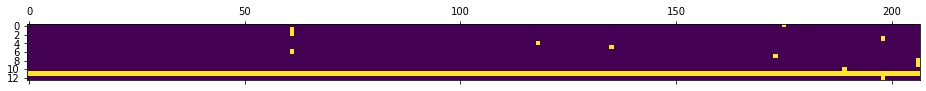

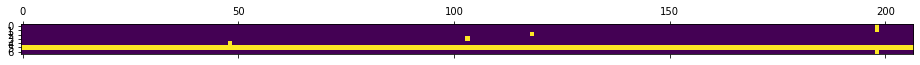

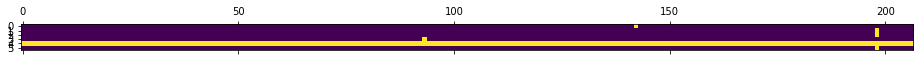

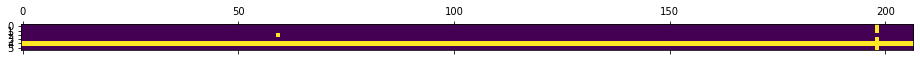

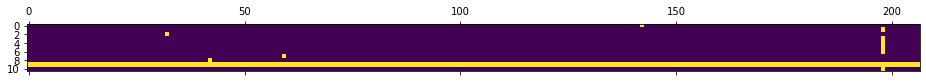

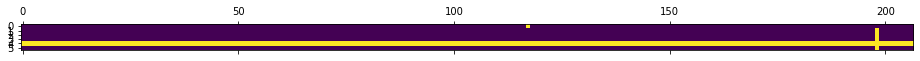

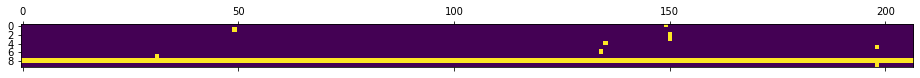

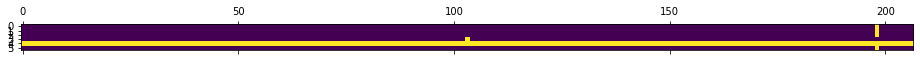

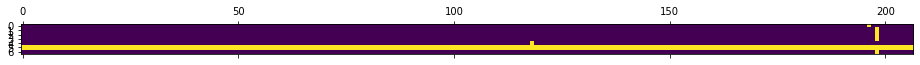

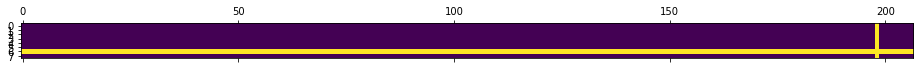

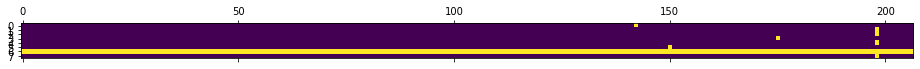

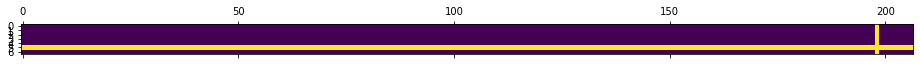

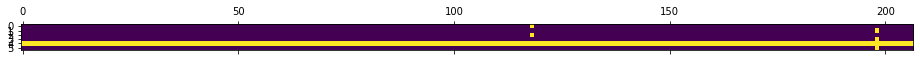

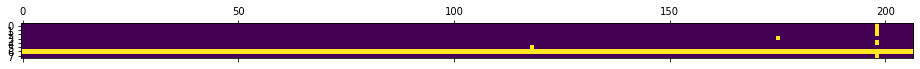

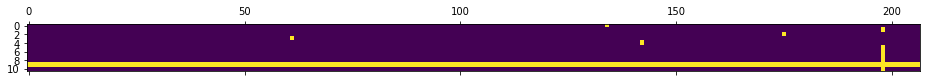

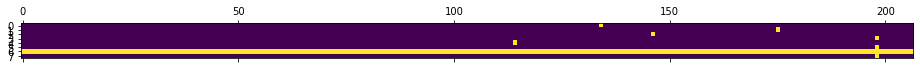

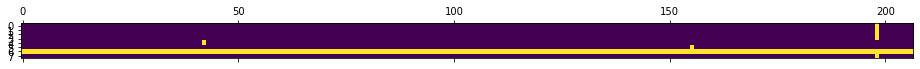

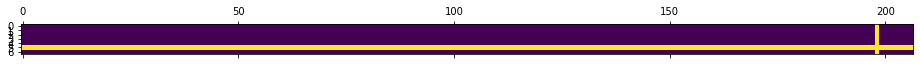

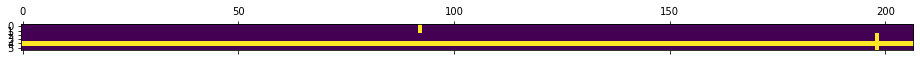

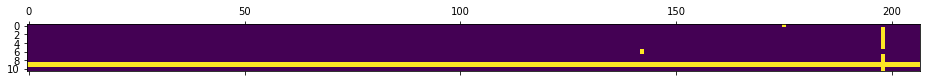

In [10]:
for k in well_classified[-20:]:
    mat = np.concatenate((jobs_outs[k]["argmax_pred"],
                         np.ones((1, 207)),
                         label_to_one_hot(jobs_outs[k]["labels"], 207)), axis=0)
    plt.matshow(mat)


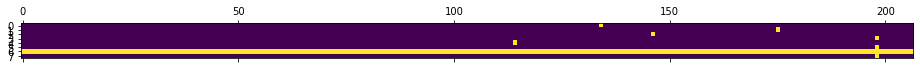

In [32]:
mat = np.concatenate((jobs_outs[738024]["argmax_pred"],
                     np.ones((1, 207)),
                     label_to_one_hot(jobs_outs[738024]["labels"], 207)), axis=0)
plt.matshow(mat)

In [15]:
well_classified[-5]

738024

In [16]:
jobs_outs[738024]["labels"]

[[198]]

In [30]:
np.argmax(jobs_outs[738024]["argmax_pred"][-2])

114

In [31]:
lookup_cie[114]

"l'oreal"